# Lab 5 - Probability and Simpson’s Paradox
### Lean Mean Learning Machines
### Authors: 
  - "Michelle Le"
  - "Weiliang Deng"
  - "Vidhyananth Sivashanmugan"
  - "Tejas Bhawari"
### Date: 11/26/2024

::: callout-important
This is a *Team* Lab, meaning you can and should work with your project team on it.
:::

## Packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Introduction

In this lab you'll review and get practice with a variety of concepts, methods, and tools you've encountered thus far, with a focus on misrepresentation and ethics.

## Learning objectives

By the end of the lab, you will...

-   Calculate single event, conditional, and "and" probabilities.
-   Interpret probabilities in the context of the problem.
-   Display a fundamental understanding of Simpson's Paradox.
-   Practice teamwork and collaboration on GitHub.

## Guidelines

As we've discussed in lecture, your plots should include an informative title, axes should be labeled, and careful consideration should be given to aesthetic choices.

::: callout-note
Remember that continuing to develop a sound workflow for reproducible data analysis is important as you complete the lab and other assignments in this course.
There will be periodic reminders in this assignment to remind you to **Run all, commit, and sync** your changes to GitHub.
You should have at least 3 commits with meaningful commit messages by the end of the assignment.
:::

# Getting started

All team members should clone the team GitHub repository for the lab.
Then, one team member should edit the document Markdown cell by adding the team name to the `Team name` field and adding the names of the team members contributing to lab to the `Authors` field.
Hopefully that's everyone, but if someone doesn't contribute during the lab session or throughout the week before the deadline, their name should not be added.
If you have 4 members in your team, you can delete the line for the 5th team member.
Then, this team member should render the document and commit and push the changes.
All others should **not** touch the document at this stage.


# Lab 5 - Probability and Simpson’s Paradox
### Lean Mean Learning Machines
### Authors: 
  - "Michelle Le"
  - "Weiliang Deng"
  - "Vidhyananth Sivashanmugan"
  - "Tejas Bhawari"
### Date: 11/26/2024



# Questions

::: callout-important
Pick another member of the team write the answer to Part 1.
All others should contribute to the discussion but only one person should type up the answer, render the document, commit, and push to GitHub.
All others should **not** touch the document.
:::


## Part 1 - Probability and you

### Question 1

We use probabilities all the time when making decisions.
*As a group*, provide *two* real world examples of when you've used probability to make decisions in your every day life.
Think critically.
Be creative.

**Example 1** - Weather

We often make predictions on the probability of what the weather would be like for the upcoming day or week. Even if we end up relying on the weather channel to verify our predictions, it doesn't stop us from using informal probability calculations to predict the weather - especially since many weather predictions do not go further than a month into the future. Will it still be over 100 degrees in Phoenix for the next 3 months? Would we still be living in Phoenix in the next 5 years? Will we move before our neighbors move? These are some of the questions we face as residents in Phoenix. We can use variables such as how many days has it already been, how many days of summer are there left, some combination of what we've heard experts say, and what the previous summers were like. We can even look at weather in neighboring cities and states with hope that we would get to see some of the monsoon clouds coming up from Mexico. As the days get hotter and longer without any hope of monsoon season appearing, we then start thinking about the probabilities of us living in Arizona in the next 5 years. 

**Example 2** - What is the best time to travel?

The best traveling plans are made when we start with a place that we've been dreaming to go to, what we want to do, and who do we want to go with. Maybe you've been wanting to take the family to Disneyworld, spend a weekend in a cabin with friends, go on a romantic honeymoon in the Bahamas, or take a solo trip to Japan. Dreaming of this part is easy. Now the real question is when is the best time to go? Here, we would have to rely on probabilities to help us come up with the best dates to go on that dream vacation. We would have to consider factors that can help increase the likelihood that we would enjoy our trip the way we want to. Factors such as: What are the busiest travel dates for that location? What activities are happening and which ones are we interested in? What days can our friends and family simultaneously request PTO for? What is our budget? When are the kids go on summer break? What would the weather be like in that location? If you want to take the kids to Disneyworld in Florida, maybe you should avoid dates that fall within hurricane season. If you want that quiet romantic honeymoon, maybe it would be best to avoid busy travel dates. These variable are all used to help us determine the best and most efficient dates for us to choose when planning that dream vacation. 

::: callout-important
After the team member working on Part 1 renders, commits, and pushes, another team member should pull their changes and render the document.
Then, they should write the answer to Part 2.
All others should contribute to the discussion but only one person should type up the answer, render the document, commit, and push to GitHub.
All others should **not** touch the document.
:::

## Part 2 - Risk of coronary heart disease

This data set is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
We want to examine the relationship between various health characteristics and the risk of having heart disease.

### Question 2

Load in the data set called `education-disease` and answer the following questions below.

In [ ]:
Education_dt = pd.read_csv('data/education-disease.csv')

Education_dt.head() 

### Question 3

How many levels of education are there in these data?
How many levels of disease are there?
**Hint:** The `unique()` function might be helpful.


In [ ]:
education_levels = Education_dt['education'].unique() if 'education' in Education_dt.columns else None
disease_levels = Education_dt['TenYearCHD'].unique() if 'TenYearCHD' in Education_dt.columns else None

education_count = len(education_levels) if education_levels is not None else "Column 'education' not found."
disease_count = len(disease_levels) if disease_levels is not None else "Column 'disease' not found."

print("unique number of education levels:",education_levels,"\ncount of education level:", education_count)

print("unique number of disease levels:",disease_levels,"\ncount of disease level:", disease_count)

### Question 4

Convert the data to a two-way table where each cell is the number of people falling into each combination of Disease and Education.
**Hint:** Use `groupby` and `pivot_table`.
Your answer should be a 4x3 data frame with counts in each cell.


In [ ]:
two_way_table = (
        Education_dt
        .groupby(['TenYearCHD', 'education'])
        .size()
        .reset_index(name='count')
        .pivot_table(index='TenYearCHD', columns='education', values='count', fill_value=0)
    )
print(two_way_table)

Using the summary table you created above, answer the remaining questions.
You do not have to use Python functions for your calculations, you can use Python as a calculator using the values from the summary table.
Make sure to show your work, i.e., instead of reporting just the final answer, use Python to calculate that in a way we can see the counts you've used along the way.


### Question 5

What is the probability of a random individual having high school or GED education and not being high risk for cardiovascular disease?

In [ ]:
# Considering 2.0 as the highschool level
count_high_school = 1106
total_count = 1397 + 1106 + 601 + 403 + 323 + 147 + 88 + 70

# Calculating the probability
probability = (count_high_school / total_count)*100
print(round(probability,2),"%")

### Question 6

What is the probability that a random individual who is already high risk for cardiovascular disease has a college education?

In [ ]:
# Selecting a random individual
count_college_high = 70
total_high_risk = 323 + 147 + 88 + 70

# Calculating the probability
probability_college_high = (count_college_high / total_high_risk)*100
print(round(probability_college_high,2),"%")

::: callout-important
After the team member working on Part 2 renders, commits, and pushes, another team member should pull their changes and render the document.
Then, they should write the answer to Part 3.
All others should contribute to the discussion but only one person should type up the answer, render the document, commit, and push to GitHub.
All others should **not** touch the document.
:::

## Part 3 - Bike rentals

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic.
You are tasked to investigate the relationship between the temperature outside and the number of bikes rented in the Washington DC area between the years 2011 and 2022.
You will be investigating data for the months June, July, September, and November.

Below is a list of variables and their definitions:

| Variable  | Definition                                                                     |
|------------------|------------------------------------------------------|
| `season`  | Numerical representation of Spring (2), Summer (3), and Fall (4)               |
| `year`    | Numerical representation of 2011 (0) or 2012 (1)                               |
| `month`   | Month in which data were collected                                             |
| `holiday` | Indicator variable for whether data were collected on a holiday (1) or not (0) |
| `weekday` | Numerical representation of day of week                                        |
| `temp`    | Temperature in Celsius                                                         |
| `count`   | Number of bike rentals for that day                                            |

### Question 7

(a) Read in the `bike` data.
    Then, create a scatter plot that investigates the relationship between the number of bikes rented and the temperature outside.
    Include a straight line of best fit to help discuss the discovered relationship.
    Summarize your findings in 2-3 sentences.

(b) Another researcher suggests to look at the relationship between bikes rented and temperature by each of the four months of interest.
    Recreate your plot in part a, and color the points by month.
    Include a straight line for each of the four months to help discuss each month's relationship between bikes rented and temperature.
    In 3-4 sentences, summarize your findings.

In [ ]:
# read data
bike = pd.read_csv('data/bike.csv')
bike.head()

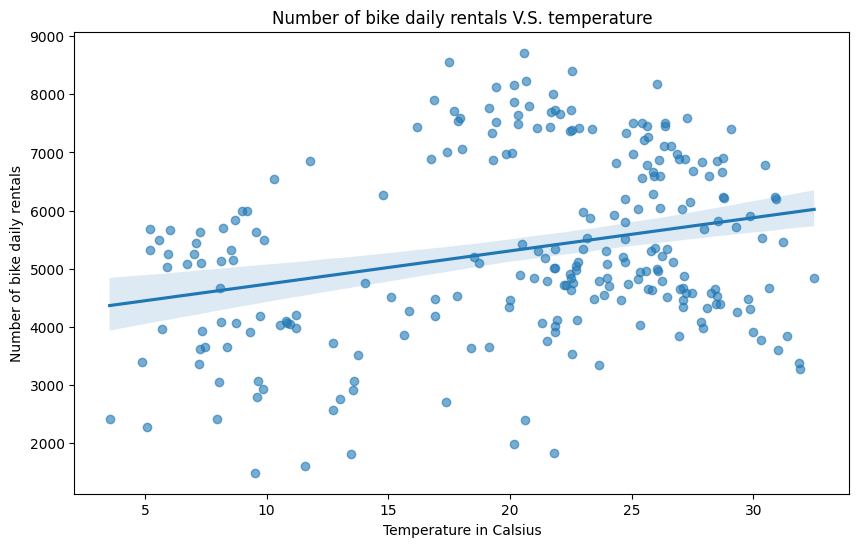

In [27]:
# Q7 (a)
plt.figure(figsize =(10,6))
sns.regplot(data=bike, x='temp', y='count', scatter_kws={'alpha': 0.6})
plt.title('Number of bike daily rentals V.S. temperature')
plt.xlabel('Temperature in Calsius')
plt.ylabel('Number of bike daily rentals')
plt.show()

Q7 (a) Summary:

There is a positive relationship between number of bike daily rentals and temperature. While a linear relationship can be observed, there is a higher density of rentals when temperature is higher.

The four month of interests are:  [ 6  7  9 11]


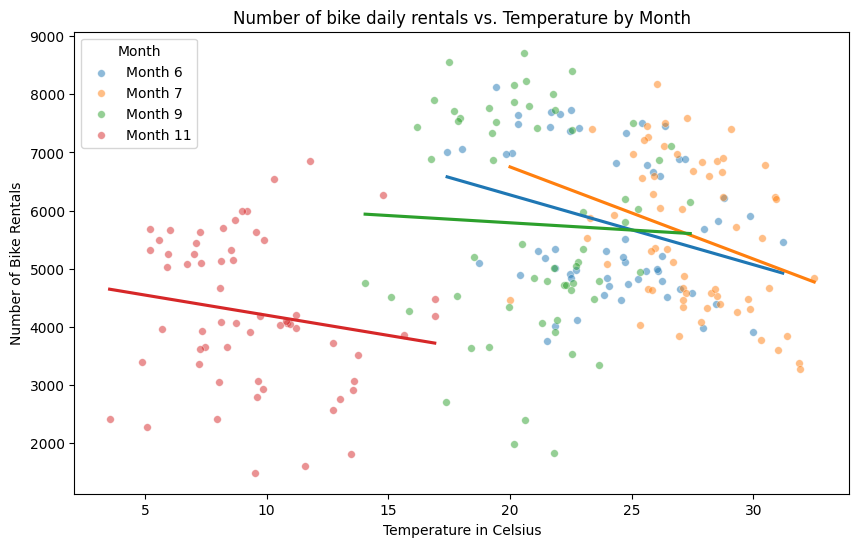

In [24]:
# Q7 (b)

# figure out which are the four months of interst by displaying the unique values in the 'month' column
unique_months = bike['month'].unique()
print('The four month of interests are: ',unique_months)

plt.figure(figsize =(10,6))

# use color to differentiate months
palette = sns.color_palette("tab10", n_colors=len(unique_months))


for i, month in enumerate(unique_months):
    bike_by_month = bike[bike['month'] == month]
    sns.scatterplot(
        data=bike_by_month,
        x="temp",
        y="count",
        color=palette[i],
        label=f"Month {month}",
        alpha=0.5,
        s=30
    )
    sns.regplot(
        data=bike_by_month,
        x="temp",
        y="count",
        scatter=False,
        color=palette[i],
        ci=None
    )


plt.title("Number of bike daily rentals vs. Temperature by Month")
plt.xlabel("Temperature in Celsius")
plt.ylabel("Number of Bike Rentals")
plt.legend(title="Month", loc="upper left")
plt.show()

Q7 (b) Summary:

All the regression lines show a different trend from what we observed in Q7(a). As temperature increases, the number of bike rentals decreases in each target month. In September, there is only a slight change in rentals with rising temperatures, whereas in June and July, rentals decrease sharply as temperatures rise. In November, the number of rentals is the lowest overall compared to the other months.

Please watch the following video on Simpson's Paradox [here](https://www.youtube.com/watch?v=ebEkn-BiW5k).
After you do, please answer the following questions.

### Question 8

In your own words, summarize Simpson's Paradox in 2-3 sentences.

Answer:

Simpson's Paradox is when different group of data are combined to do statistical analysis, the result trend might be contradict with results obtained from analyzing each group individually. And thereofore the conclusion is misleading if we ignore the group-level variations.

### Question 9

Compare and contrast your findings from part (a) and part (b).
What's different?

Answer:

In part (a), when we combined all the months to analyze the relationship between daily rentals and temperature, the results indicated a positive impact. This approach assumes a uniform relationship across all months, which overlooks seasonal variations. However, in part (b), when we examined each target month individually, a negative relationship emerged, highlighting that bike rentals vary significantly depending on the season.

### Question 10

Think critically about your answer to part d.
What other context from this study could be creating this paradox?
That is, identify a potential confounding

Answer:

Holiday
Weekday/ weekends
Weather (rainy/ sunny)
As shown at the beginning, the variables table includes "Holiday" and "Weekday." I believe these two factors could lead to significantly different results. Additionally, weather conditions, though not captured in the dataset, likely have a substantial impact on daily rentals. Intuitively, people are less likely to ride bikes on rainy days.

# Closing an issue with a commit

Go to your GitHub repository, you will see an issue with the title "Learn to close an issue with a commit".

Your goal is to close this issue with a commit to practice this workflow, which is the workflow you will use when you are addressing feedback on your projects.

-   Go to the relevant section in your lab .ipynb file.
-   Delete the sentence that says "Delete me".
-   Render the document.
-   Commit your changes from the git tab with the commit message *"Delete sentence, closes #1."*
-   Push your changes to your repo and observe that the issue is now closed and the commit associated with this move is linked from the issue.

GitHub allows you to close an issue directly with commits if the commit uses one of the following keywords followed bu the issue number (which you can find next to the issue title): close, closes, closed, fix, fixes, fixed, resolve, resolves, and resolved.


# Wrap-up

## Submission

::: callout-warning
Before you wrap up the assignment, make sure all of your documents are updated on your GitHub repo.
We will be checking these to make sure you have been practicing how to commit and push changes.

You must turn in the .ipynb file by the submission deadline to be considered "on time".
:::

::: callout-important
## Checklist

Make sure you have:

-   attempted all questions
-   run all code in your Jupyter notebook
-   committed and pushed everything to your GitHub repository such that the Git pane in VS Code is empty
:::

## Grading

The lab is graded out of a total of 50 points.

On Questions 1 through 10, you can earn up to 5 points on each question:

-   5: Response shows excellent understanding and addresses all or almost all of the rubric items.

-   4: Response shows good understanding and addresses most of the rubric items.

-   3: Response shows understanding and addresses a majority of the rubric items.

-   2: Response shows effort and misses many of the rubric items.

-   1: Response does not show sufficient effort or understanding and/or is largely incomplete.

-   0: No attempt.
